In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
normal = pd.read_csv ("Normal.csv")
type_h = pd.read_csv ("Type_H.csv")
type_s = pd.read_csv ("Type_S.csv")

In [3]:
print ("NORMAL")
print (normal.shape)
print (normal.columns)

print ("TYPE_H")
print (type_h.shape)
print (type_h.columns)

print ("TYPE_S")
print (type_s.shape)
print (type_s.columns)

NORMAL
(100, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
TYPE_H
(60, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
TYPE_S
(150, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


WHILE THE COLUMN NAMES FOR ALL THE 3 DATAFRAMES ARE SAME, THE NUMBER OF SAMPLES IN THE 3 DATAFRAMES ARE QUITE DIFFERENT, THERE ARE 50% MORE OF THE TYPE_S THAN NORMAL AND MORE THAN 100% OF TYPE_S THAN TYPE_H, WHICH WOULD REQUIRE SOME BALANCING BEFORE TRAINING OF DATA

In [4]:
print ("Datatype of Normal is:",type(normal))
print ("Datatype of Type_S is:",type(type_s))
print ("Datatype of Type_H is:",type(type_h))


Datatype of Normal is: <class 'pandas.core.frame.DataFrame'>
Datatype of Type_S is: <class 'pandas.core.frame.DataFrame'>
Datatype of Type_H is: <class 'pandas.core.frame.DataFrame'>


In [5]:
print ("Class variation in Normal ")
print (normal['Class'].value_counts())

print ("Class variation in Type_S")
print (type_s['Class'].value_counts())

print ("Class variation in Type_H")
print (type_h['Class'].value_counts())

Class variation in Normal 
Class
Normal    73
Nrmal     27
Name: count, dtype: int64
Class variation in Type_S
Class
Type_S    133
tp_s       17
Name: count, dtype: int64
Class variation in Type_H
Class
Type_H    37
type_h    23
Name: count, dtype: int64


IN NORMAL, "Normal" APPROXIMATELY 170% MORE THAN "Nrmal"
IN TYPE_S, "Type_S" IS APPROXIMATELY 700% MORE THAN "tp_s"
IN TYPE_H, "Type_H" IS APPROXIMATELY 50% MORE  THAN "type_h"

WHILE NORMAL AND TYPE_S IS SEVERLY UNBALANCED AND REQUIRE BALANCING, BUT BEFORE COMBINING ALL THREE, WE NEED TO CHECK IN CASE THE DIFFERENT CLASSES DON'T HAVE ANY TYPO ERROR.

In [6]:
normal['Class'] = 'Normal'
type_s['Class'] = 'Type_s'
type_h['Class'] = 'Type_h'

In [7]:
print ("Class variation in Normal ")
print (normal['Class'].value_counts())

print ("Class variation in Type_S")
print (type_s['Class'].value_counts())

print ("Class variation in Type_H")
print (type_h['Class'].value_counts())

Class variation in Normal 
Class
Normal    100
Name: count, dtype: int64
Class variation in Type_S
Class
Type_s    150
Name: count, dtype: int64
Class variation in Type_H
Class
Type_h    60
Name: count, dtype: int64


In [8]:
combined_data = pd.concat([normal,type_s,type_h])
print (combined_data.shape)

(310, 7)


In [9]:
#printing 5 random samples
print (combined_data.sample(n=5))

     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
1      54.920858  18.968430  51.601455  35.952428  125.846646   2.001642   
101    67.263149   7.194661  51.696887  60.068488   97.801085  42.136943   
14     57.300227  24.188885  47.000000  33.111342  116.806587   5.766947   
43     66.285394  26.327845  47.500000  39.957549  121.219684  -0.799624   
39     58.521623  13.922286  41.467855  44.599337  115.514798  30.387984   

      Class  
1    Normal  
101  Type_s  
14   Type_h  
43   Type_h  
39   Type_s  


In [10]:
#finding the number of null values in each column in percentage and checking that each of column other than Class has only numeric values
combined_data['P_incidence'] = pd.to_numeric (combined_data['P_incidence'],errors='coerce')
combined_data['P_tilt'] = pd.to_numeric (combined_data['P_tilt'],errors='coerce')
combined_data['L_angle'] = pd.to_numeric (combined_data['L_angle'],errors='coerce')
combined_data['S_slope'] = pd.to_numeric (combined_data['S_slope'],errors='coerce')
combined_data['P_radius'] = pd.to_numeric (combined_data['P_radius'],errors='coerce')
combined_data['S_Degree'] = pd.to_numeric (combined_data['S_Degree'],errors='coerce')
print ((combined_data.isnull().sum()/combined_data.shape[0])*100)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


In [11]:
print (combined_data.describe())

       P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082


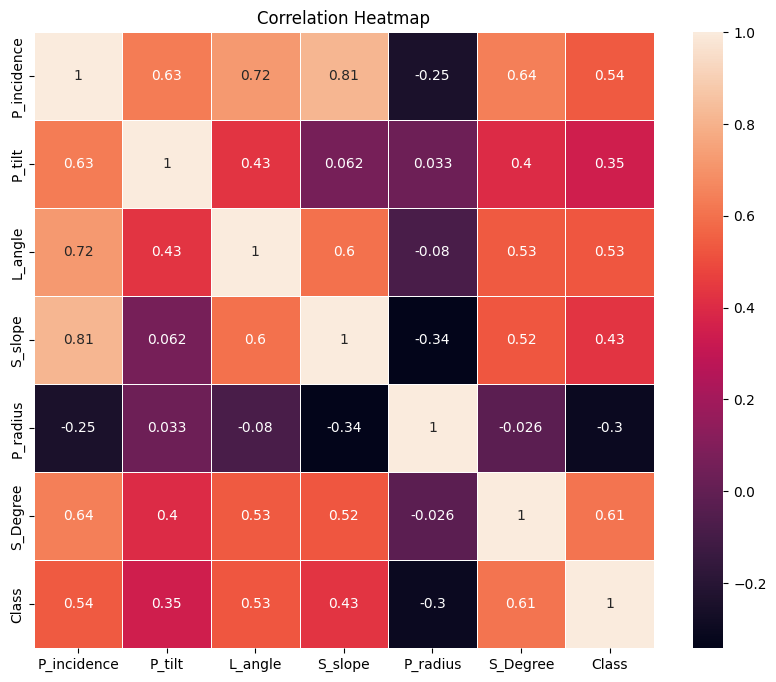

In [12]:
#Heatmap to visualize correlation between all the features

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
combined_data['Class'] = label_encoder.fit_transform(combined_data['Class'])

corr_matrix = combined_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

THE FEATURES THAT STRONGER CORRELATION

1. P_incidence with P_tilt, L_angle, S_slope, S_Degree
2. P_tilt with S_slope
3. L_angle with S_slope
4. S_degree with Class

THE FEATURES WITH MODERATE CORRELATION

1. P_incidence with Class
2. L_angle with S_Degree, Class
3. S_slope with S_degree

THE FEATUERS THAT WEAKER CORRELATION

1. P_incidence with P_radius
2. P_tilt with L_angle, P_radius, S_degree and Class
3. L_angle with P_radius
4. S_slope with P_radius, Class
5. P_radius with S_degree, Class

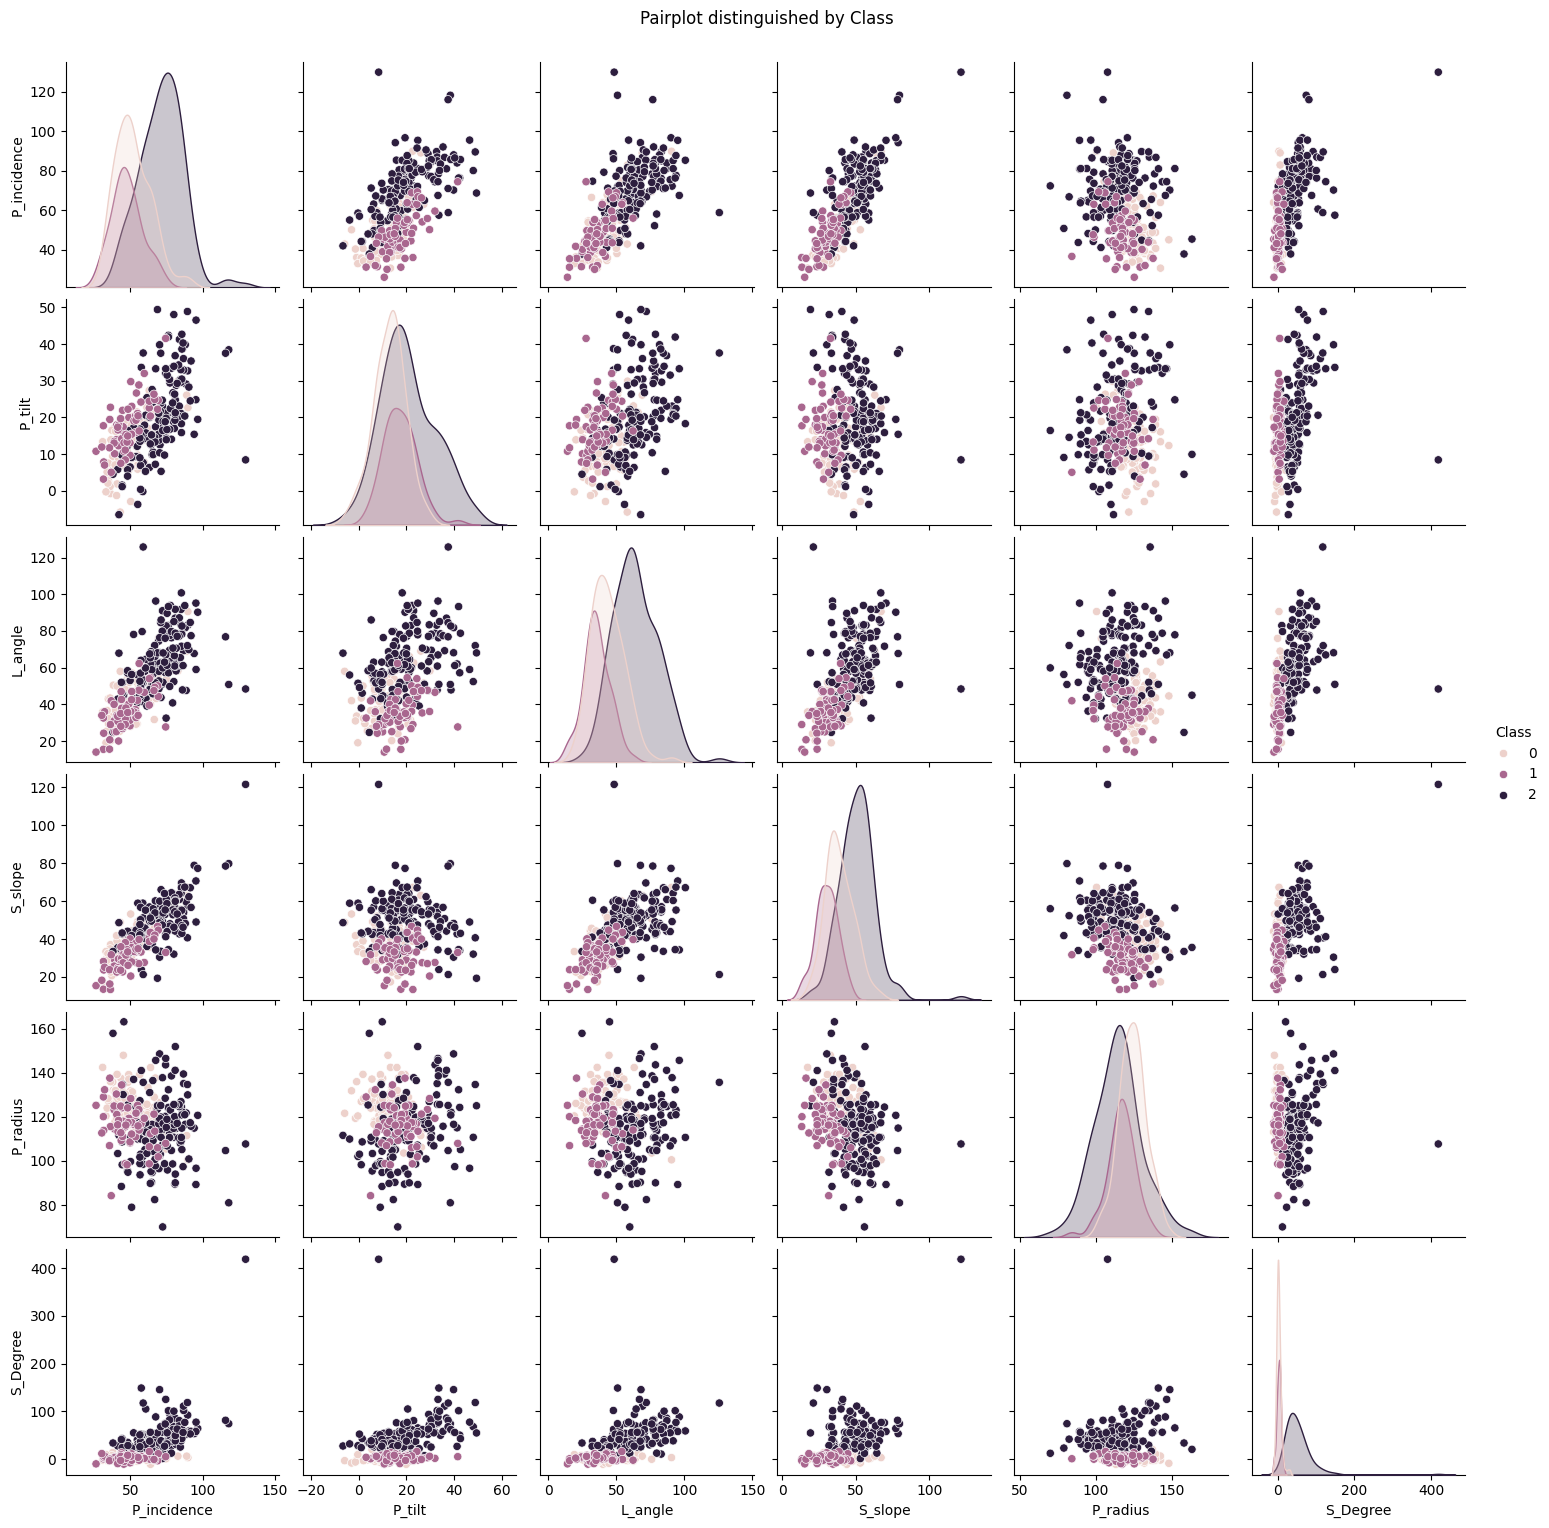

In [13]:
#pairplot based on the 'Class' parameter
sns.pairplot(combined_data, hue='Class')
plt.suptitle('Pairplot distinguished by Class', y=1.02)
plt.show()

FROM THE ABOVE PAIR PLOT WE CAN COMMENT SINCE IN EACH CASE THE DATA POINTS ARE OVERLAPPING BASED ON 'CLASS' COLUMN THEN

1. DATA CANNOT BE LINEARLY CLASSIFIABLE TO DEFINE WHICH CLASS IT BELONGS BASED ON ANY OF THE TWO FEATURES.
2. IT IS DIFFICULT TO NON-LINEARLY CLASSIFY IN MOST CASES TO DEFINE WHICH CLASS IT BELONGS TO BASED ON ANY OF THE TWO FEATURES 

FROM THIS INFORMATION, WE CAN CONCLUDE THAT THE BIVARIATE DISTRIBUTION IS VERY DENSE IN CERTAIN REGIONS AND SPARSE IN THE REST.

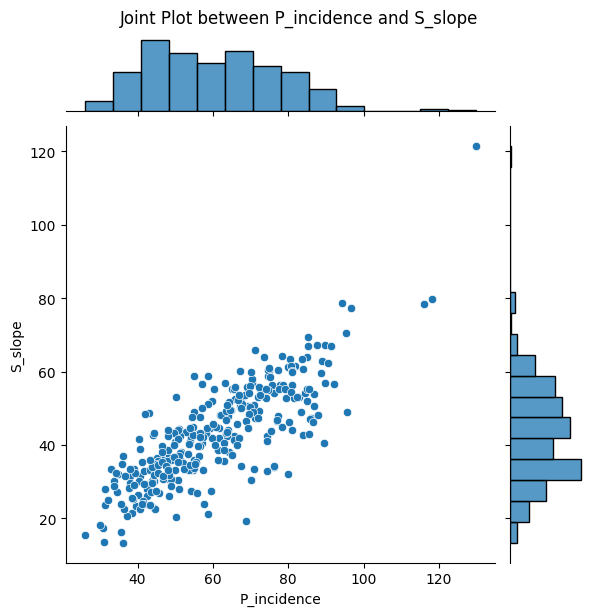

In [14]:
#joint plot based on 'P_incidence' vs 'S_slope'
sns.jointplot(x='P_incidence', y='S_slope', data=combined_data)
plt.suptitle('Joint Plot between P_incidence and S_slope', y=1.02)
plt.show()

FROM THE ABOVE JOINT PLOT BASED ON 'P_INCIDENCE' AND 'S_SLOPE', WE CAN COMMENT THAT:

1. THE BIVARIATE DISTRIBUTION BETWEEN S_SLOPE AND P_INCIDENCE JUSTFIES THE DATA IS MORE DENSE IN CERTAIN REGIONS AND SPARSE IN THE REST. 
2. THE UNIVARIATE DISTRIBUTION OF P_INCIDENCE IS LESS DENSE COMPARED TO S_SLOPE
3. THE UNIVARIATE DISTIRIBUTION OF S_SLOPE IS MORE DENSE COMPARED TO P_INCIDENCE 

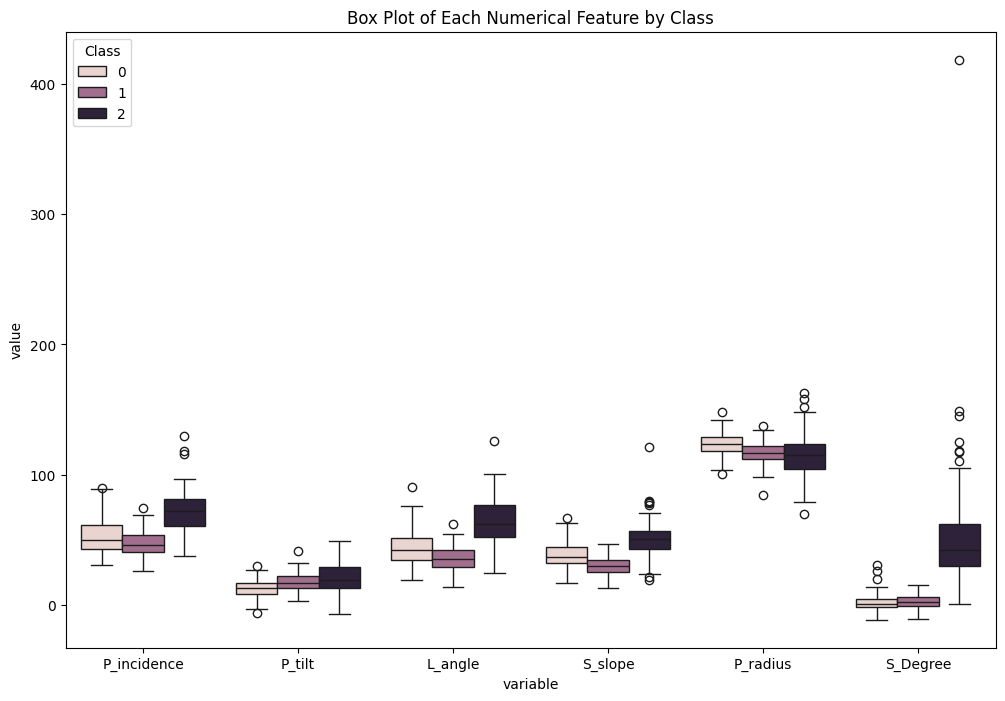

In [15]:
# Melt the DataFrame to long format for seaborn
combined_data_melted = combined_data.melt(id_vars='Class', value_vars=['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree'])
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', hue='Class', data=combined_data_melted)
plt.title('Box Plot of Each Numerical Feature by Class')
plt.show()

FROM THE ABOVE BOX PLOT, WE CAN COMMENT THAT:

1. P_INCIDENCE HAVE THE DISTRIBUTION RANGE OF DATA PRETTY MUCH EQUAL IN ALL THREE CLASSES
2. P_TILT HAVE DISTRIBUTION RANGE OF DATA PRETTY EQUAL IN ALL THREE CLASSES
3. L_ANGLE HAVE DISTRIBUTION RANGE OF DATA PRETTY EQUAL IN ALL THREE CLASSES
4. S_SLOPE HAVE DISTRIBUTION RANGE OF DATA PRETTY EQUAL IN ALL THREE CLASSES
5. P_RADIUS HAVE DISTRIBUTION RANGE OF DATA LITTLE UNEQUAL WITH TYPE_H CLASS HAVING MORE DISTRIBUTION RANGE
6. S_DEGREE HAVE VERY UNEQUAL DISTRIBUTION RANGE WITH TYPE_H HAVING MORE DISTRIBUTION RANGE.

TRAINING UNDER DIFFERENT SCENERIOS

In [16]:
#training of the dataset 
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

train_data = combined_data

le = LabelEncoder()
train_data['Class'] = le.fit_transform(train_data['Class'])

X = train_data.drop('Class',axis =1)
y = train_data['Class']

knn = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.2)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7419354838709677
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.61      0.64        23
           1       0.46      0.60      0.52        10
           2       0.93      0.90      0.91        29

    accuracy                           0.74        62
   macro avg       0.69      0.70      0.69        62
weighted avg       0.76      0.74      0.75        62



In [17]:
#training and testing of data after balancing of the dataset
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

train_data_balancing = combined_data

le = LabelEncoder()
train_data_balancing['Class'] = le.fit_transform(train_data_balancing['Class'])

X = train_data_balancing.drop('Class', axis=1)
y = train_data_balancing['Class']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.80      1.00      0.89        24
           2       0.96      0.89      0.92        27

    accuracy                           0.89        90
   macro avg       0.89      0.90      0.89        90
weighted avg       0.90      0.89      0.89        90



In [18]:
#training of data after scaling of the dataset
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

train_data_scaling = combined_data

le = LabelEncoder()
train_data_scaling['Class'] = le.fit_transform(train_data_scaling['Class'])

X = train_data_scaling.drop('Class',axis =1)
y = train_data_scaling['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7419354838709677
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.78      0.70        18
           1       0.45      0.45      0.45        11
           2       0.93      0.82      0.87        33

    accuracy                           0.74        62
   macro avg       0.67      0.68      0.68        62
weighted avg       0.76      0.74      0.75        62



In [19]:
#training of the data after performing hyperparameter tuning using GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

train_data_hyperparameter = combined_data

le = LabelEncoder()
train_data_hyperparameter['Class'] = le.fit_transform(train_data_hyperparameter['Class'])

X = train_data_hyperparameter.drop('Class',axis=1)
y = train_data_hyperparameter['Class']

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

knn_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                weights=grid_search.best_params_['weights'],
                                metric=grid_search.best_params_['metric'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
knn_best.fit(X_train, y_train)

y_pred = knn_best.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8548387096774194
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.50      0.80      0.62         5
           2       0.94      0.94      0.94        32

    accuracy                           0.85        62
   macro avg       0.77      0.83      0.79        62
weighted avg       0.87      0.85      0.86        62



In [20]:
#training of data using both the methods- Scaling, Hyperparameter tuning and Balancing of the dataset
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from imblearn.over_sampling import SMOTE

train_data_final = combined_data

le = LabelEncoder()
train_data_final['Class'] = train_data_final['Class']

X = combined_data.drop('Class', axis=1)
y = combined_data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

knn_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                weights=grid_search.best_params_['weights'],
                                metric=grid_search.best_params_['metric'])

X_train,X_test,y_train,y_test = train_test_split (X_resampled,y_resampled,test_size=0.2)
knn_best.fit(X_resampled,y_resampled)

y_pred = knn_best.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        31

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



THERE HAVE BEEN CERTAIN SIGNIFICANT IMPROVEMENTS IN THE TRAINING OF THE MODELS

1. ACCURACY = APPROX 25% OF INCREMENT
2. PRECISION = APPROX 35% OF INCREMENT
3. THE MODEL THAT I HAVE USED IS WHEN WE BALANCE THE DATA USING SMOTE SO THAT DURING MODEL TRAINING, MODEL DOES NOT OVERFIT ON SAMPLES IN ABUNDANCE & SCALE THE DATA SO THAT MODEL IS NOT MISGUIDED FROM THE POINTS THAT ARE FAR AWAY FROM THE CENTER.